In [28]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

z = sp.Symbol("z", complex = True)
n, k, j, n_0 = sp.symbols("n k j n_0", integer = True)
N = 200

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


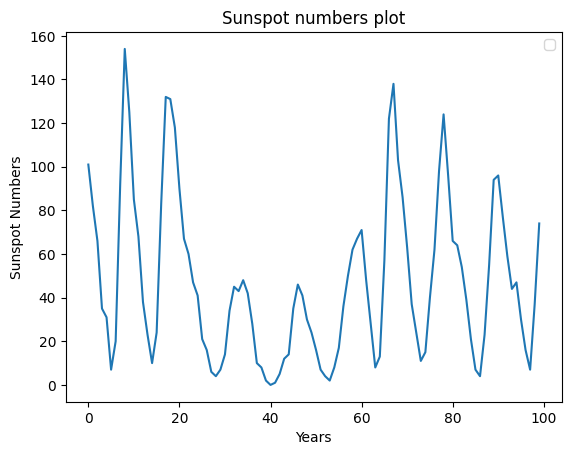

In [135]:
# Insertar phi y theta
mu = 46.93
phi = 1 - 1.317 * z + 0.634 * z**2
theta = 1
sigma = 17.008821240756223 # standard deviation
X = np.array([
    101, 82, 66, 35, 31, 7, 20, 92, 154, 125,
    85, 68, 38, 23, 10, 24, 83, 132, 131, 118,
    90, 67, 60, 47, 41, 21, 16, 6, 4, 7, 
    14, 34, 45, 43, 48, 42, 28, 10, 8, 2,
    0, 1, 5, 12, 14, 35, 46, 41, 30, 24,
    16, 7, 4, 2, 8, 17, 36, 50, 62, 67,
    71, 48, 28, 8, 13, 57, 122, 138, 103, 86,
    63, 37, 24, 11, 15, 40, 62, 98, 124, 96,
    66, 64, 54, 39, 21, 7, 4, 23, 55, 94,
    96, 77, 59, 44, 47, 30, 16, 7, 37, 74
])
years = np.arange(1770,1870)
plt.plot(X)
plt.xlabel("Years")
plt.ylabel(rf"Sunspot Numbers")
plt.title(f"Sunspot numbers plot")
plt.legend()
plt.show()

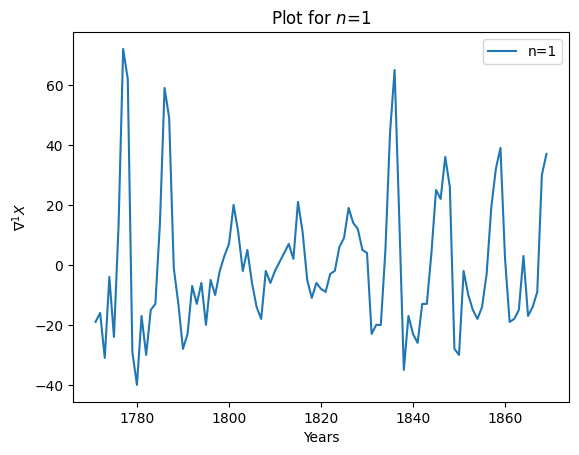

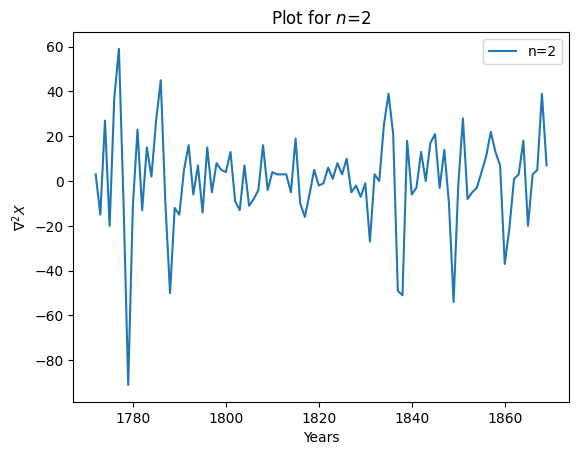

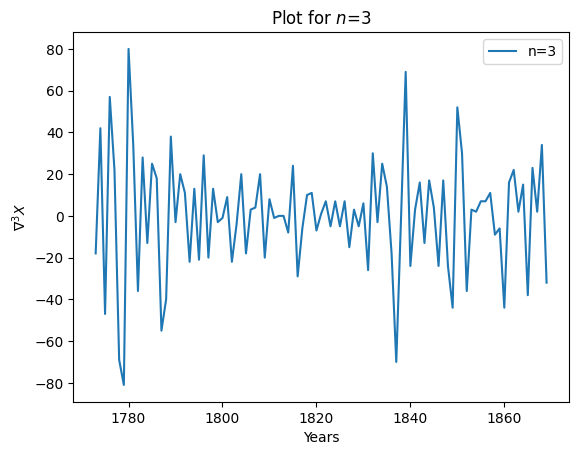

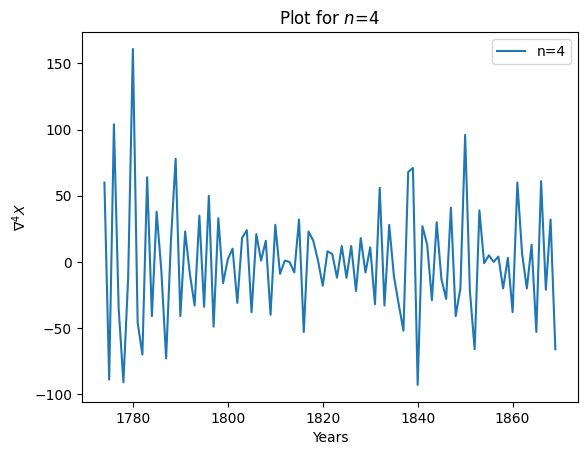

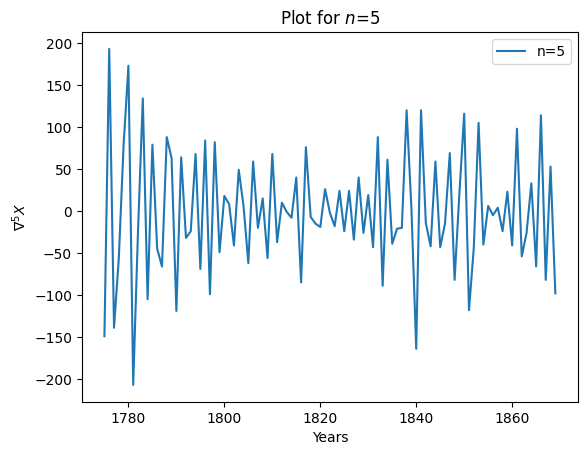

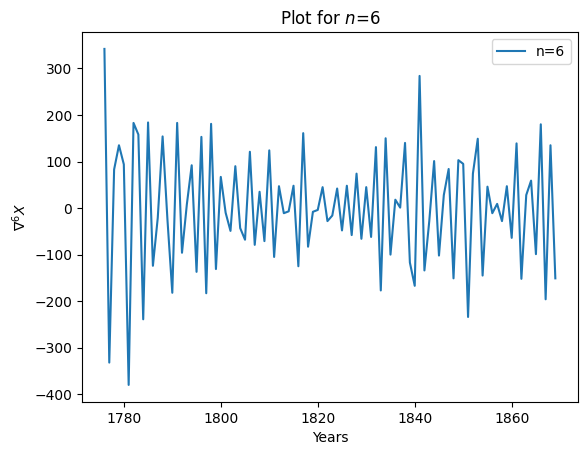

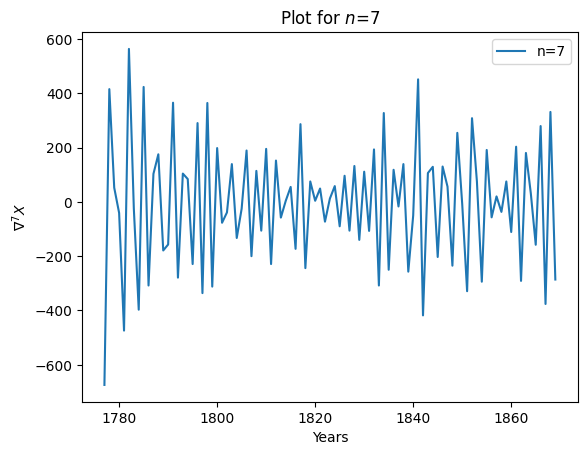

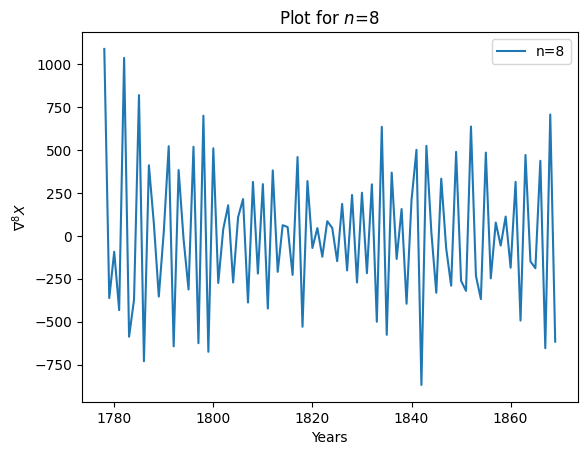

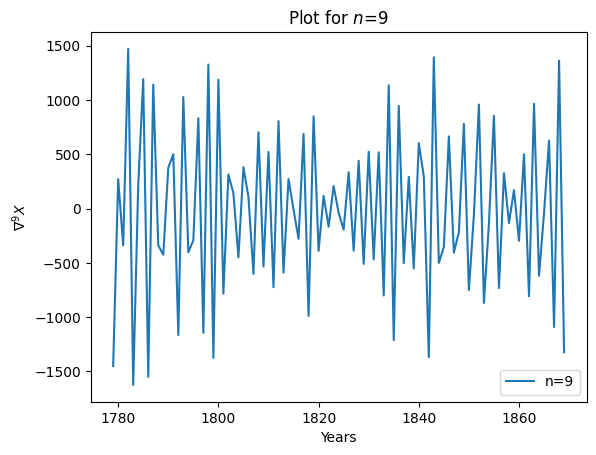

In [133]:
from functools import reduce
I = lambda X : X[1:]
B = lambda X : X[:-1]

max = []
for n in range(1,10,1):
    years_reduced = reduce(lambda x, _: I(x), range(n), years)
    I_minus_B_n_times = reduce(lambda x, _: I(x)-B(x), range(n), X)
    max.append(np.max(np.abs(I_minus_B_n_times)))
    plt.figure()  # Create a new figure for each n
    plt.plot(years_reduced, I_minus_B_n_times, label=f'n={n}')
    plt.xlabel("Years")
    plt.ylabel(rf"$\nabla^{{{n}}} X$")
    plt.title(f"Plot for $n$={n}")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


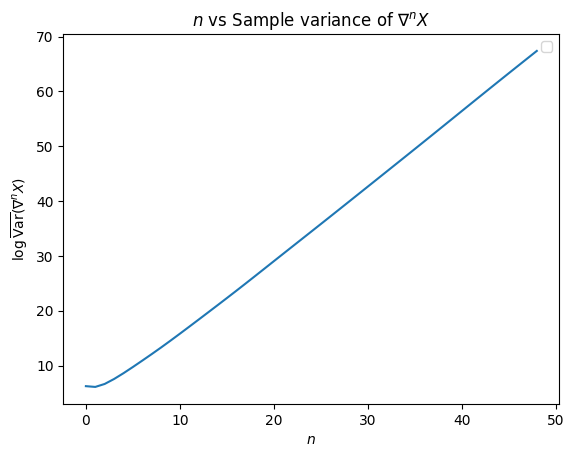

In [145]:
variance = []
for n in range(1,50,1):
    I_minus_B_n_times = reduce(lambda x, _: I(x)-B(x), range(n), X)
    variance.append(np.var(I_minus_B_n_times, ddof=1))
plt.plot(np.log(variance))
plt.xlabel("$n$")
plt.ylabel(rf"$\log \overline{{\text{{Var}}}}(\nabla^n X)$")
plt.title(rf"$n$ vs Sample variance of $\nabla^n X$")
plt.legend()
plt.show()